In [1]:
%run ../chap09/cnn_ext_model.ipynb
%run ../chap09/dataset_dummy.ipynb

imagenet = DummyDataset('imagenet', 'select', [224,224,3], 1000)

In [2]:
CnnExtModel.set_macro('p24',
    ['serial',
        ['loop', {'repeat':'#repeat'}, ['conv', {'ksize':3, 'chn':'#chn'}]],
        ['max', {'stride':2}]])

CnnExtModel.set_macro('vgg_19',
    ['serial',
        ['custom', {'name':'p24', 'args':{'#repeat':2, '#chn':64}}],
        ['custom', {'name':'p24', 'args':{'#repeat':2, '#chn':128}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':256}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':512}}],
        ['custom', {'name':'p24', 'args':{'#repeat':4, '#chn':512}}],
        ['loop', {'repeat':2}, ['full', {'width':4096}]]])

vgg19 = CnnExtModel('vgg_19', imagenet,
        ['custom', {'name':'vgg_19'}], dump_structure=True)

custom vgg_19
  serial
    custom p24
      serial
        loop
          1: conv, [224, 224, 3]=>[224, 224, 64] pm:3x3x3x64+64=1792
          2: conv, [224, 224, 64]=>[224, 224, 64] pm:3x3x64x64+64=36928
        3: max, [224, 224, 64]=>[112, 112, 64]
    custom p24
      serial
        loop
          4: conv, [112, 112, 64]=>[112, 112, 128] pm:3x3x64x128+128=73856
          5: conv, [112, 112, 128]=>[112, 112, 128] pm:3x3x128x128+128=147584
        6: max, [112, 112, 128]=>[56, 56, 128]
    custom p24
      serial
        loop
          7: conv, [56, 56, 128]=>[56, 56, 256] pm:3x3x128x256+256=295168
          8: conv, [56, 56, 256]=>[56, 56, 256] pm:3x3x256x256+256=590080
          9: conv, [56, 56, 256]=>[56, 56, 256] pm:3x3x256x256+256=590080
          10: conv, [56, 56, 256]=>[56, 56, 256] pm:3x3x256x256+256=590080
        11: max, [56, 56, 256]=>[28, 28, 256]
    custom p24
      serial
        loop
          12: conv, [28, 28, 256]=>[28, 28, 512] pm:3x3x256x512+512=1180160
      

In [3]:
CnnExtModel.set_macro('pn',
    ['serial',
        ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
        ['loop', {'repeat':'#cnt1'},
                 ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('plain_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':6}, ['conv', {'ksize':3, 'chn':64, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':7, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':11, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':5, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

plain_34 = CnnExtModel('plain_34', imagenet,
       ['custom', {'name':'plain_34', 'args':{'#act':'LA'}}], dump_structure=True)

custom plain_34
  serial
    1: conv, [224, 224, 3]=>[112, 112, 64] pm:7x7x3x64+64=9472
    2: max, [112, 112, 64]=>[56, 56, 64]
    loop
      3: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
      4: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
      5: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
      6: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
      7: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
      8: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
    custom pn
      serial
        9: conv, [56, 56, 64]=>[28, 28, 128] pm:3x3x64x128+128=73856
        loop
          10: conv, [28, 28, 128]=>[28, 28, 128] pm:3x3x128x128+128=147584
          11: conv, [28, 28, 128]=>[28, 28, 128] pm:3x3x128x128+128=147584
          12: conv, [28, 28, 128]=>[28, 28, 128] pm:3x3x128x128+128=147584
          13: conv, [28, 28, 128]=>[28, 28, 128] pm:3x3x128x128+128=147584
          14: conv, [28, 28, 128]=>[28, 28, 128] pm:3x3x128x128+128=1

In [4]:
CnnExtModel.set_macro('rf',
    ['add', {'x':True},
        ['serial', ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]]])

CnnExtModel.set_macro('rh',
    ['add', {'x':False},
        ['serial', ['conv', {'ksize':3, 'stride':2, 'chn':'#n', 'actions':'#act'}],
                   ['conv', {'ksize':3, 'chn':'#n', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('rfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('rhalf',
    ['serial',
        ['custom', {'name':'rh', 'args':{'#n':'#n', '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
                 ['custom', {'name':'rf', 'args':{'#n':'#n', '#act':'#act'}}]]])

CnnExtModel.set_macro('residual_34',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':3, '#n':64, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':3, '#n':128, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':5, '#n':256, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':2, '#n':512, '#act':'#act'}}],
        ['avg', {'stride':7}]])

residual_34 = CnnExtModel('residual_34', imagenet,
    ['custom', {'name':'residual_34', 'args':{'#act':'LA'}}], dump_structure=True)

custom residual_34
  serial
    1: conv, [224, 224, 3]=>[112, 112, 64] pm:7x7x3x64+64=9472
    2: max, [112, 112, 64]=>[56, 56, 64]
    custom rfull
      serial
        loop
          custom rf
            add
              serial
                3: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
                4: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
          custom rf
            add
              serial
                5: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
                6: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
          custom rf
            add
              serial
                7: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
                8: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
    custom rhalf
      serial
        custom rh
          add
            serial
              9: conv, [56, 56, 64]=>[28, 28, 128] pm:3x3x64x128+128=73856
              10: conv, [28, 28, 128]=>[28, 28, 128] p

In [5]:
CnnExtModel.set_macro('bf',
    ['add', {'x':True},
        ['serial',
            ['conv', {'ksize':1, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]]])

CnnExtModel.set_macro('bh',
    ['add', {'x':False},
        ['serial',
            ['conv', {'ksize':1, 'stride':2, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':3, 'chn':'#n1', 'actions':'#act'}],
            ['conv', {'ksize':1, 'chn':'#n4', 'actions':'#act'}]],
        ['avg', {'stride':2}]])

CnnExtModel.set_macro('bfull',
    ['serial',
        ['loop', {'repeat':'#cnt'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bhalf',
    ['serial',
        ['custom', {'name':'bh', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}],
        ['loop', {'repeat':'#cnt1'},
            ['custom', {'name':'bf', 'args':{'#n1':'#n1', '#n4':'#n4',
                '#act':'#act'}}]]])

CnnExtModel.set_macro('bottleneck_152',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':64, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull','args':{'#cnt':3,'#n1':64,'#n4':256,'#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':7,'#n1':128,'#n4':512,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':35,'#n1':256,'#n4':1024,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf','args':{'#cnt1':2,'#n1':512,'#n4':2048,
            '#act':'#act'}}],
        ['avg', {'stride':7}]])

bottleneck_152 = CnnExtModel('bottleneck_152', imagenet,
        ['custom', {'name':'bottleneck_152', 'args':{'#act':'LAB'}}],
                    dump_structure=True)

custom bottleneck_152
  serial
    1: conv, [224, 224, 3]=>[112, 112, 64] pm:7x7x3x64+64=9472
    2: max, [112, 112, 64]=>[56, 56, 64]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [56, 56, 64]=>[56, 56, 64] pm:1x1x64x64+64=4160
                4: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
                5: conv, [56, 56, 64]=>[56, 56, 256] pm:1x1x64x256+256=16640
          custom bf
            add
              serial
                6: conv, [56, 56, 256]=>[56, 56, 64] pm:1x1x256x64+64=16448
                7: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
                8: conv, [56, 56, 64]=>[56, 56, 256] pm:1x1x64x256+256=16640
          custom bf
            add
              serial
                9: conv, [56, 56, 256]=>[56, 56, 64] pm:1x1x256x64+64=16448
                10: conv, [56, 56, 64]=>[56, 56, 64] pm:3x3x64x64+64=36928
                11: conv, [56, 56, 64]=>[56, 56, 

                83: conv, [14, 14, 1024]=>[14, 14, 256] pm:1x1x1024x256+256=262400
                84: conv, [14, 14, 256]=>[14, 14, 256] pm:3x3x256x256+256=590080
                85: conv, [14, 14, 256]=>[14, 14, 1024] pm:1x1x256x1024+1024=263168
          custom bf
            add
              serial
                86: conv, [14, 14, 1024]=>[14, 14, 256] pm:1x1x1024x256+256=262400
                87: conv, [14, 14, 256]=>[14, 14, 256] pm:3x3x256x256+256=590080
                88: conv, [14, 14, 256]=>[14, 14, 1024] pm:1x1x256x1024+1024=263168
          custom bf
            add
              serial
                89: conv, [14, 14, 1024]=>[14, 14, 256] pm:1x1x1024x256+256=262400
                90: conv, [14, 14, 256]=>[14, 14, 256] pm:3x3x256x256+256=590080
                91: conv, [14, 14, 256]=>[14, 14, 1024] pm:1x1x256x1024+1024=263168
          custom bf
            add
              serial
                92: conv, [14, 14, 1024]=>[14, 14, 256] pm:1x1x1024x256+256=262400
  

In [6]:
%run ../chap05/dataset_flowers.ipynb

fd = FlowersDataset([64,64], [64,64,3])

custom plain_flower
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    loop
      3: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
      4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
      5: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
      6: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
    custom pn
      serial
        7: conv, [16, 16, 16]=>[8, 8, 32] pm:3x3x16x32+32=4640
        loop
          8: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
          9: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
          10: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
    custom pn
      serial
        11: conv, [8, 8, 32]=>[4, 4, 64] pm:3x3x32x64+64=18496
        loop
          12: conv, [4, 4, 64]=>[4, 4, 64] pm:3x3x64x64+64=36928
          13: conv, [4, 4, 64]=>[4, 4, 64] pm:3x3x64x64+64=36928
          14: conv, [4, 4, 64]=>[4, 4, 64] pm:3x3x64x64+64=36928
    15: avg, [4, 4, 6

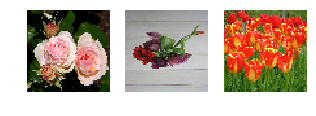

추정확률분포 [ 4,96, 0, 0, 0] => 추정 dandelion : 정답 rose => X
추정확률분포 [26,33,17, 9,15] => 추정 dandelion : 정답 tulip => X
추정확률분포 [ 0, 0,72, 0,28] => 추정 rose : 정답 tulip => X


In [7]:
CnnExtModel.set_macro('plain_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['loop', {'repeat':4}, ['conv', {'ksize':3, 'chn':16, 'actions':'#act'}]],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'pn', 'args':{'#cnt1':3, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

plain_flower = CnnExtModel('plain_flower', fd,
        ['custom', {'name':'plain_flower', 'args':{'#act':'LAB'}}],
                    dump_structure=True)
plain_flower.exec_all(epoch_count=10, report=2)

custom residual_flower
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    custom rfull
      serial
        loop
          custom rf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
          custom rf
            add
              serial
                5: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                6: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
    custom rhalf
      serial
        custom rh
          add
            serial
              7: conv, [16, 16, 16]=>[8, 8, 32] pm:3x3x16x32+32=4640
              8: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
            9: avg, [16, 16, 16]=>[8, 8, 16]
        loop
          custom rf
            add
              serial
                10: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
                11:

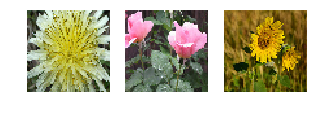

추정확률분포 [ 3,59, 7,21,10] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 0, 0,30, 0,69] => 추정 tulip : 정답 rose => X
추정확률분포 [ 0,83, 1, 9, 8] => 추정 dandelion : 정답 sunflower => X


In [8]:
CnnExtModel.set_macro('residual_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'stride':2}],
        ['custom', {'name':'rfull', 'args':{'#cnt':2, '#n':16, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':32, '#act':'#act'}}],
        ['custom', {'name':'rhalf', 'args':{'#cnt1':1, '#n':64, '#act':'#act'}}],
        ['avg', {'stride':4}]])

residual_flower = CnnExtModel('residual_flower', fd,
      ['custom', {'name':'residual_flower', 'args':{'#act':'LAB'}}],
                  dump_structure=True)
residual_flower.exec_all(epoch_count=10, report=2)

custom bottleneck_flower
  serial
    1: conv, (64, 64, 3)=>[32, 32, 16] pm:7x7x3x16+16=2368
    2: max, [32, 32, 16]=>[16, 16, 16]
    custom bfull
      serial
        loop
          custom bf
            add
              serial
                3: conv, [16, 16, 16]=>[16, 16, 16] pm:1x1x16x16+16=272
                4: conv, [16, 16, 16]=>[16, 16, 16] pm:3x3x16x16+16=2320
                5: conv, [16, 16, 16]=>[16, 16, 64] pm:1x1x16x64+64=1088
    custom bhalf
      serial
        custom bh
          add
            serial
              6: conv, [16, 16, 64]=>[8, 8, 32] pm:1x1x64x32+32=2080
              7: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
              8: conv, [8, 8, 32]=>[8, 8, 128] pm:1x1x32x128+128=4224
            9: avg, [16, 16, 64]=>[8, 8, 64]
        loop
          custom bf
            add
              serial
                10: conv, [8, 8, 128]=>[8, 8, 32] pm:1x1x128x32+32=4128
                11: conv, [8, 8, 32]=>[8, 8, 32] pm:3x3x32x32+32=9248
      

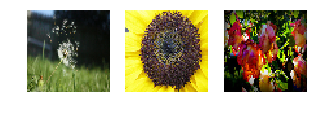

추정확률분포 [ 1,96, 2, 1, 1] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 0,98, 0, 2, 0] => 추정 dandelion : 정답 sunflower => X
추정확률분포 [ 1,21,24, 9,44] => 추정 tulip : 정답 rose => X


In [9]:
CnnExtModel.set_macro('bottleneck_flower',
    ['serial',
        ['conv', {'ksize':7, 'stride':2, 'chn':16, 'actions':'#act'}],
        ['max', {'ksize':3, 'stride':2}],
        ['custom', {'name':'bfull', 'args':{'#cnt':1,'#n1':16,'#n4': 64,
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':2,'#n1':32,'#n4':128
            '#act':'#act'}}],
        ['custom', {'name':'bhalf', 'args':{'#cnt1':1,'#n1':64,'#n4':256,
            '#act':'#act'}}],
        ['avg', {'stride':4}]])

bottleneck_flower = CnnExtModel('bottleneck_flower', fd,
    ['custom', {'name':'bottleneck_flower', 'args':{'#act':'LAB'}}],
        dump_structure=True)
bottleneck_flower.exec_all(epoch_count=10, report=2)